In [1]:
import numpy as np
import matplotlib.pyplot as plt
from temp_utils import adc2R, R2adc, R2T, T2R, adc2T, T2adc

In [2]:
T2adc(15)

1199.0

In [3]:
dataRef = np.loadtxt('../references/Littelfuse_Leaded_Thermistors_Interchangeable_Thermistors_PR502J2_RT_Table.csv', delimiter=',')

Text(0,0.5,'Temperature [$^{\\circ}$C]')

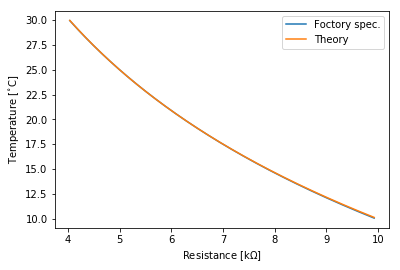

In [20]:
Temp = [10, 30]
sel = np.logical_and(dataRef[:,0]>Temp[0], dataRef[:,0]<Temp[1])
x = dataRef[:,1][sel]
plt.plot(x*1e-3, dataRef[:,0][sel], label='Foctory spec.')
plt.plot(x*1e-3, R2T(x), label='Theory')

plt.legend(loc='best')
plt.xlabel(r'Resistance [k$\Omega$]')
plt.ylabel(r'Temperature [$^{\circ}$C]')

Text(0,0.5,'ADC counts')

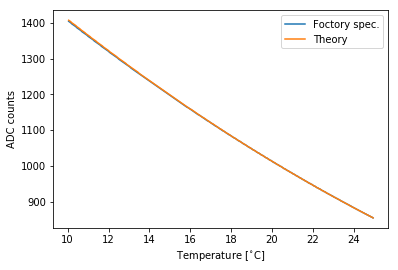

In [19]:
Temp = [10, 25]
sel = np.logical_and(dataRef[:,0]>Temp[0], dataRef[:,0]<Temp[1])
x = dataRef[:,0][sel]
adc = R2adc(dataRef[:,1][sel])
plt.plot(x, adc, label='Foctory spec.')
plt.plot(x, R2adc(T2R(x)), label='Theory')

plt.legend(loc='best')
plt.xlabel(r'Temperature [$^{\circ}$C]')
plt.ylabel('ADC counts')

In [8]:
R2T(adc2R(np.array([900])))

array([23.46079142])

In [12]:
old_cal_data = [
    [23, 900, 10],
    [-14.9,2699.587951122478,1.6717339104095916],
    [-17.8,2851.2772685609534,1.686368015662258],
    [-19.0,2949.245588936576,1.6605785365732892],
    [-21.9,3041.8061076102763,1.730012656506474],
    [-23.8,3127.7476208132493,1.6267994782938515],
    [-25.7,3207.867345124878,1.6950552762809714],
    [-27.6,3288.7016748659553,1.5798349829988798],
    [-30.5,3400.5718997361478,3.104932976935559],
    [-35.1,3548.3671163849153,1.8460043509982322],
    [-39.5,3668.696959896507,2.883634255010298]
]

old_cal_data = np.array(old_cal_data)

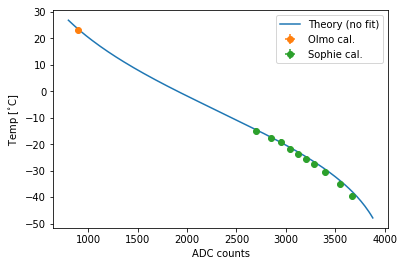

In [18]:
x = np.arange(800, 3900, 20)
plt.plot(x, R2T(adc2R(x)), label='Theory (no fit)')
plt.errorbar(old_cal_data[:1,1], old_cal_data[:1,0], yerr=1., xerr=10, fmt='o', label='Olmo cal.')
plt.errorbar(old_cal_data[1:,1], old_cal_data[1:,0], yerr=1., xerr=10, fmt='o', label='Sophie cal.')
plt.xlabel('ADC counts')
plt.ylabel(r'Temp [$^{\circ}$C]')
plt.legend(loc='best')